In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
plt.style.use('science')
plt.rcParams.update({'font.size': 25})

In [2]:
df = pd.read_excel('data.xlsx')
df2 = pd.read_excel('data.xlsx', sheet_name=1)

In [26]:
df

,V_BB,V_BE,I_b (micro),I_c( mA),V_CC,V_CE
0,0.0,0.0000,0,0.000,2,2
1,0.1,0.1232,0,0.000,2,2
2,0.2,0.2340,0,0.000,2,2
3,0.4,0.4580,0,0.007,2,2
4,0.5,0.5640,4,0.400,2,2
5,0.6,0.6390,50,6.620,2,2
6,0.7,0.6740,139,18.230,2,2
7,0.8,0.6960,244,32.300,2,2
8,0.9,0.7210,357,47.400,2,2
9,1.0,0.7450,480,63.400,2,2


In [31]:
VB2V = np.asarray(df['V_BE'][:12], dtype='float64')
IB2V = np.asarray(df['I_b (micro)'][:12], dtype='float64')
IC2V = np.asarray(df['I_c( mA)'][:12], dtype='float64')

VB3V = np.asarray(df['V_BE'][12:24], dtype='float64')
IB3V = np.asarray(df['I_b (micro)'][12:24], dtype='float64')
IC3V = np.asarray(df['I_c( mA)'][12:24], dtype='float64')

VB4V = np.asarray(df['V_BE'][25:], dtype='float64')
IB4V = np.asarray(df['I_b (micro)'][25:], dtype='float64')
IC4V = np.asarray(df['I_c( mA)'][25:], dtype='float64')





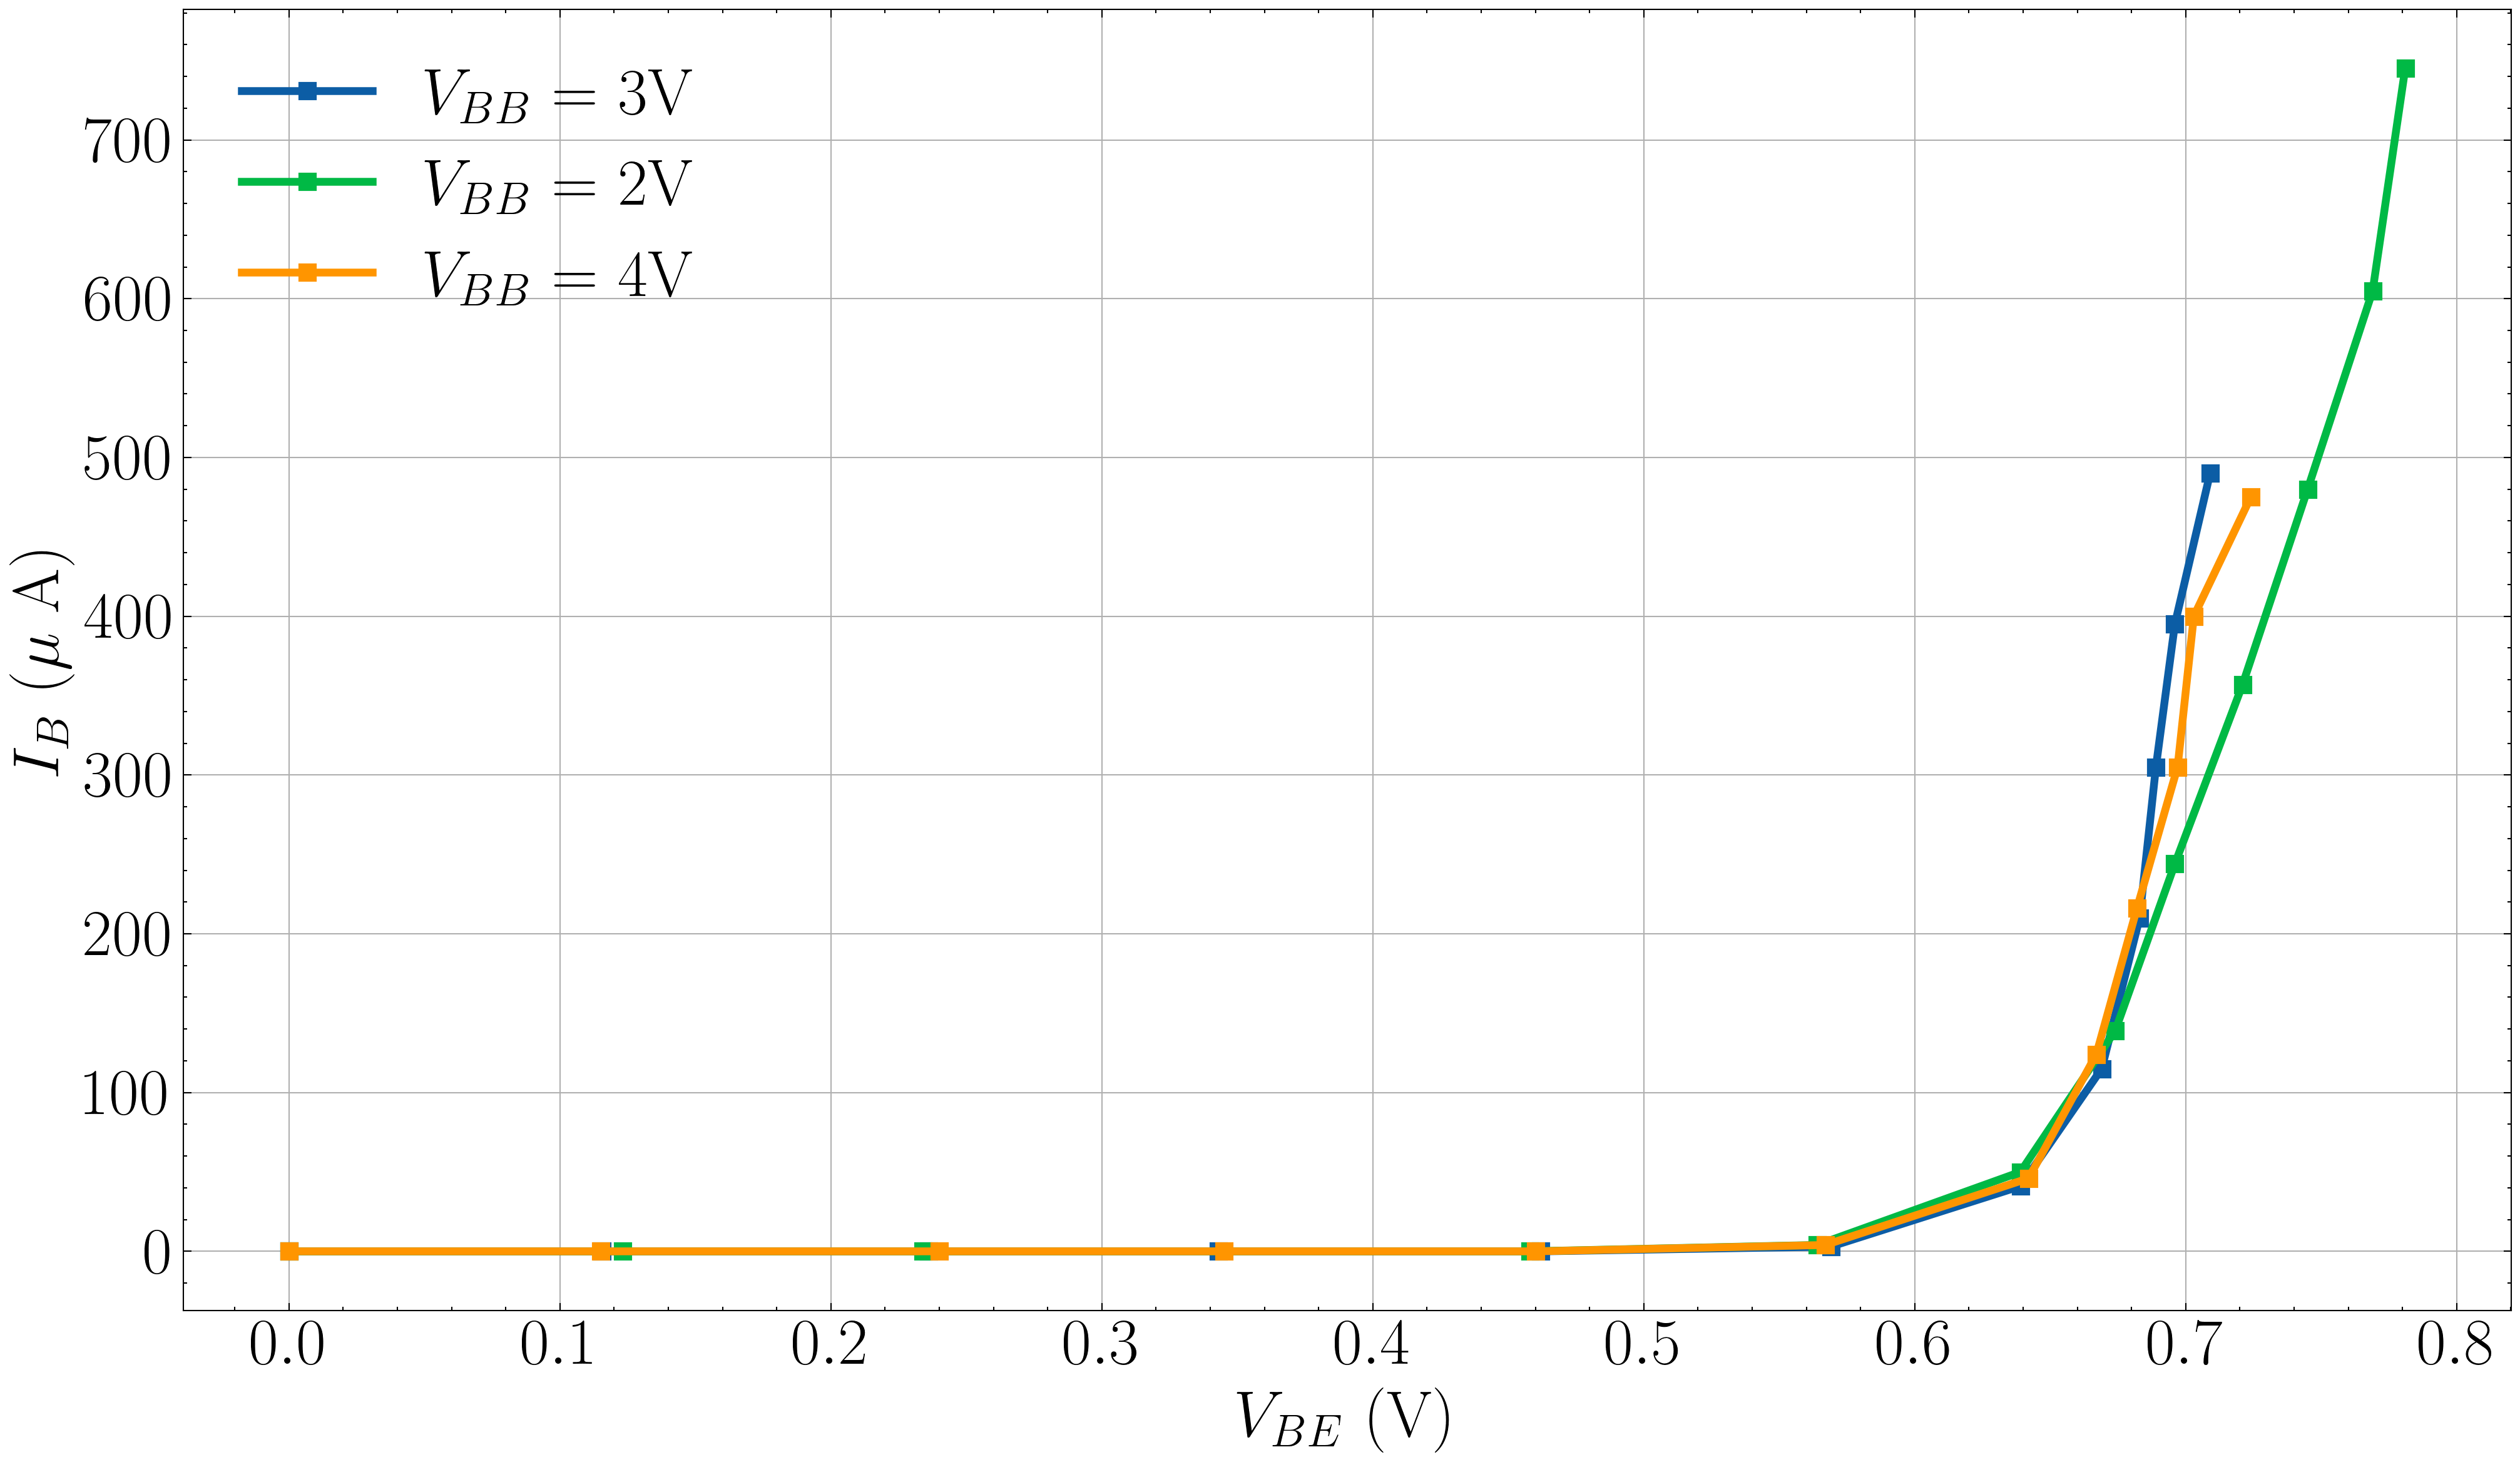

In [21]:
fig,axes = plt.subplots(1,1,figsize=(16,9), dpi = 300)
axes.plot(VB3V, IB3V, '-',lw = 3, marker ="s", label=r'$V_{BB}$ = 3V')
axes.plot(VB2V, IB2V, '-',lw = 3, marker ="s", label=r'$V_{BB}$ = 2V')
axes.plot(VB4V, IB4V, '-',lw = 3, marker ="s", label=r'$V_{BB}$ = 4V')
axes.set_xlabel(r'$V_{BE}$ (V)')
axes.set_ylabel(r'$I_B$ ($\mu$ A)')
axes.legend()
axes.grid()
fig.savefig('input.png')

In [46]:
def linfit(x, a, b):
    return a*x + b

from scipy.optimize import curve_fit

p2v, cov2v = curve_fit(linfit, IB2V, IC2V)
p3v, cov3v = curve_fit(linfit, IB3V, IC3V)
p4v, cov4v = curve_fit(linfit, IB4V, IC4V)

xval = np.linspace(0, 800, 1000)
y2v = linfit(xval, *p2v)
y3v = linfit(xval, *p3v)
y4v = linfit(xval, *p4v)

p2err = np.sqrt(np.diag(cov2v))
p3err = np.sqrt(np.diag(cov3v))
p4err = np.sqrt(np.diag(cov4v))

In [49]:
p2v,p3v,p4v,p2err,p3err,p4err

(array([0.13128175, 0.06447356]),
 array([ 0.19565006, -0.67620374]),
 array([ 0.20531228, -0.86202354]),
 array([0.00031037, 0.10449505]),
 array([0.00264193, 0.56465871]),
 array([0.00364436, 0.77509818]))

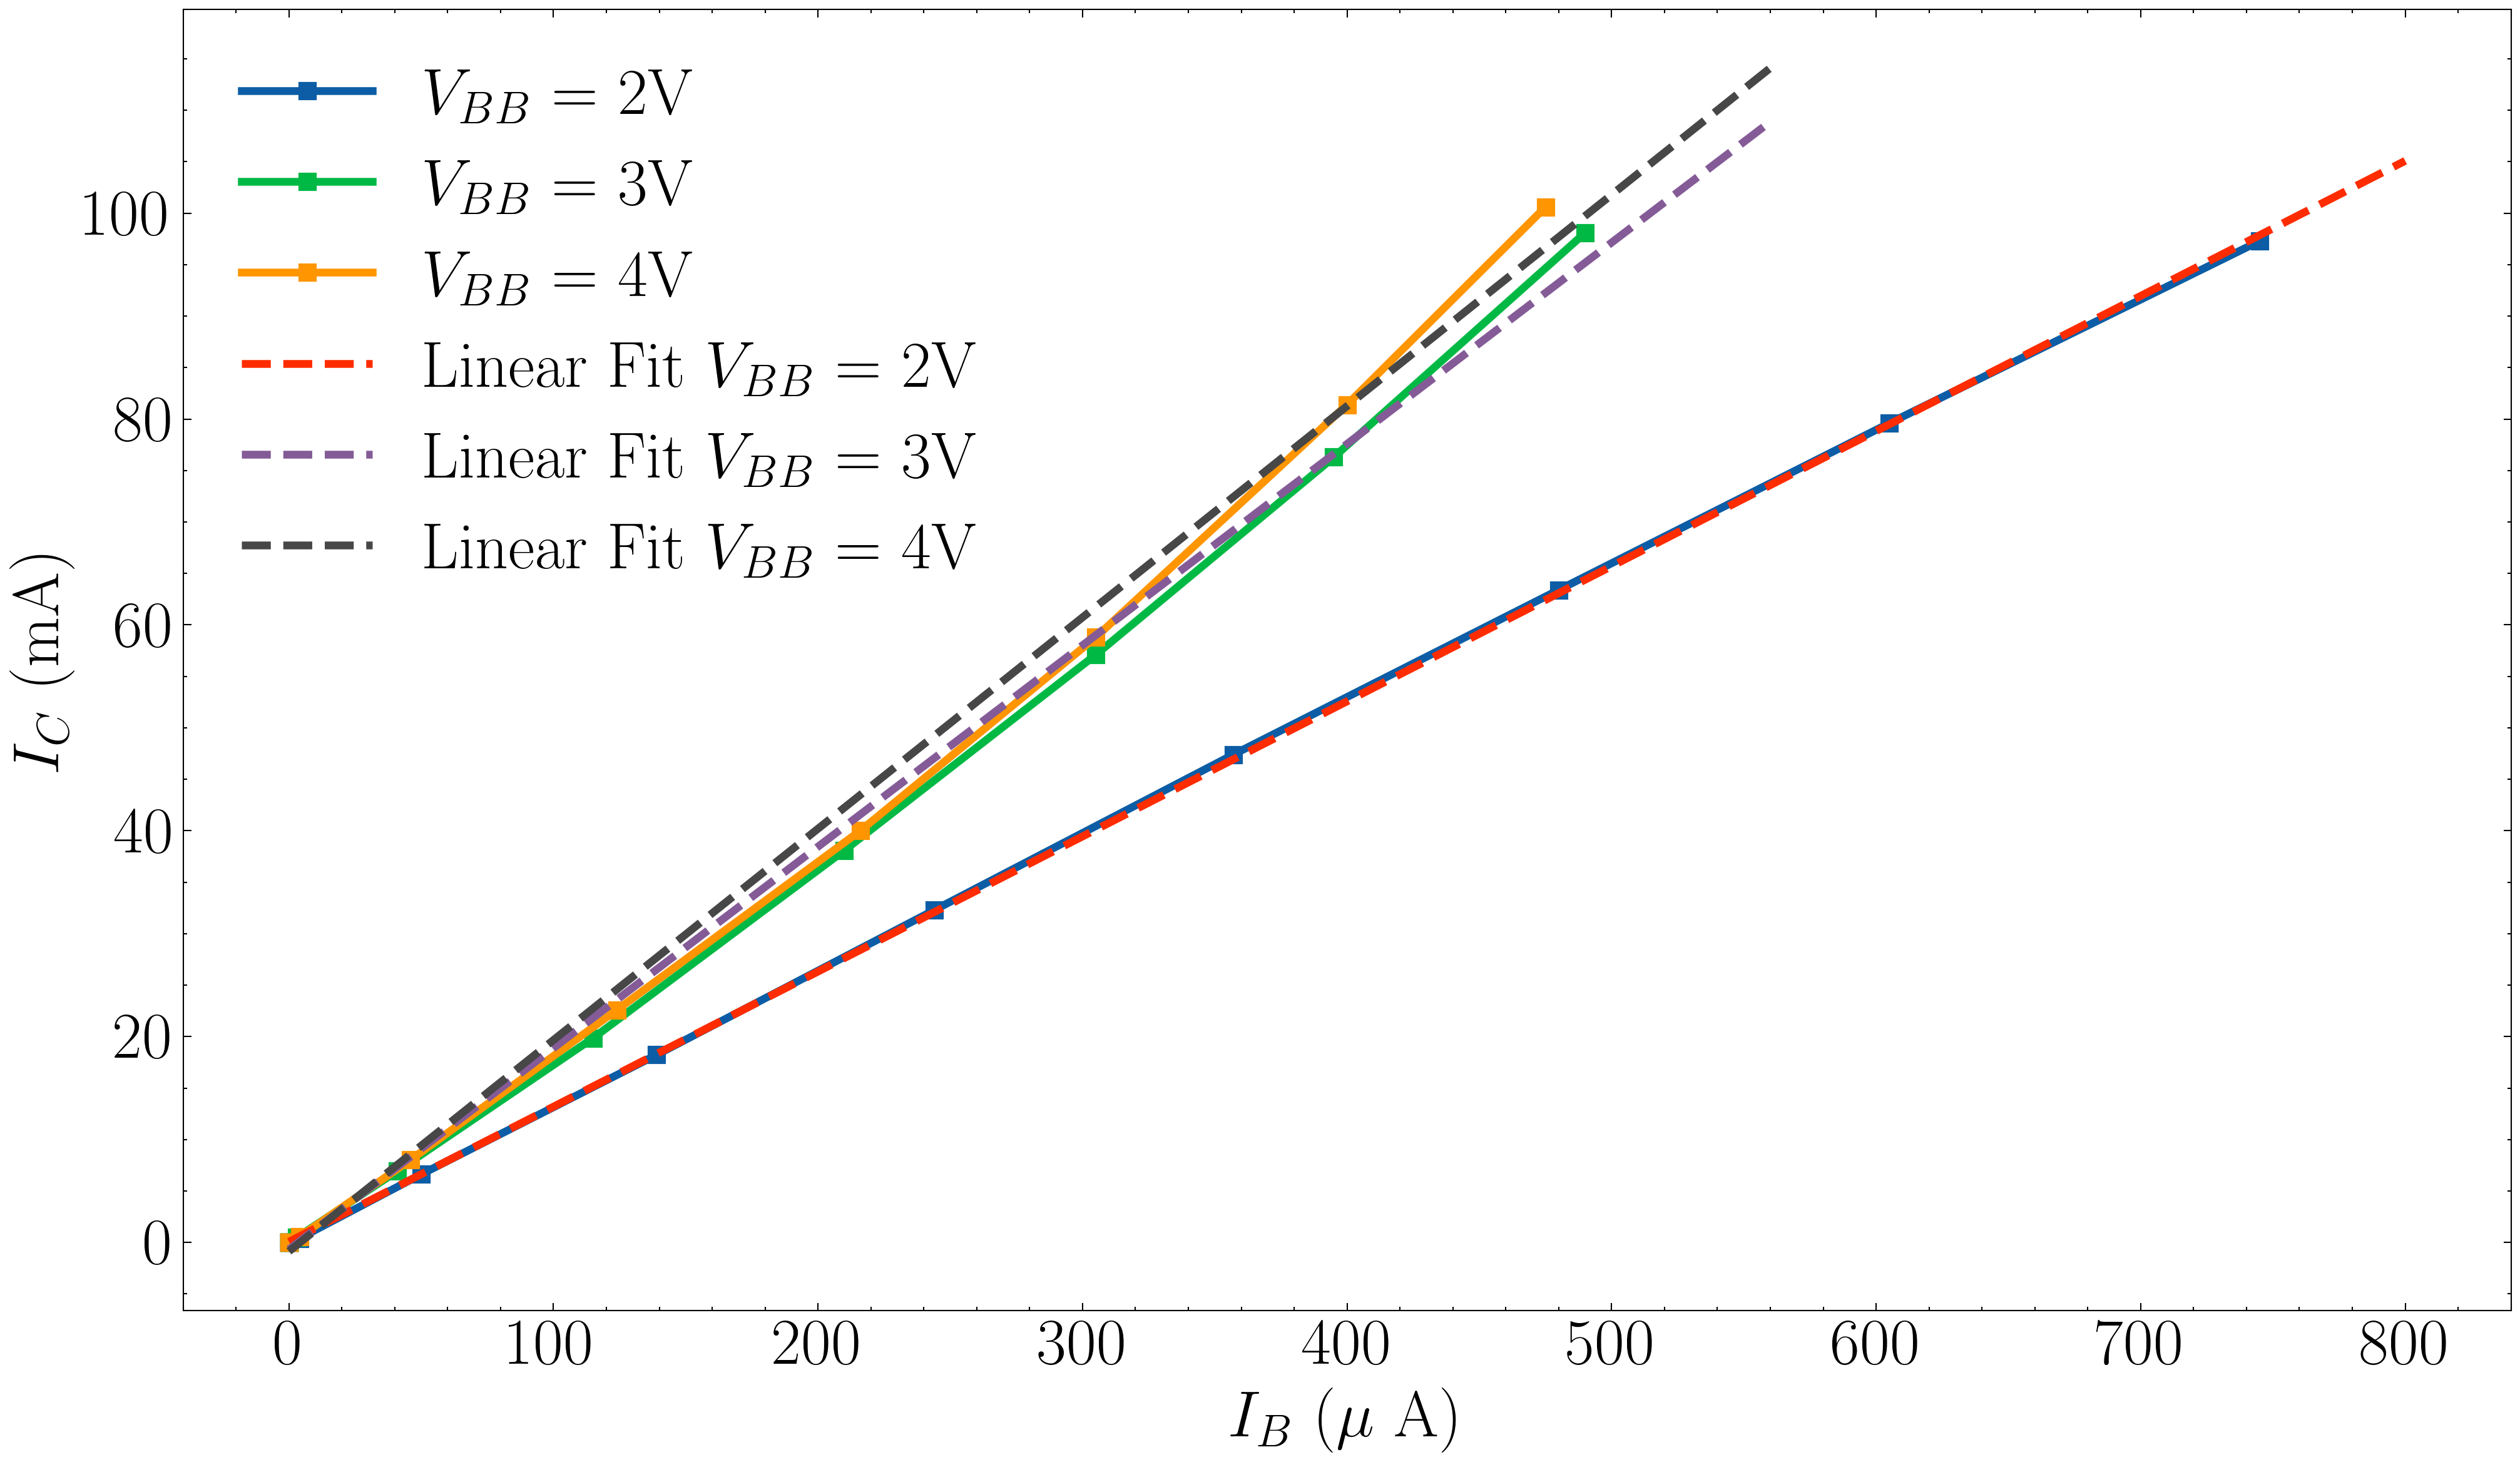

In [45]:
fig,axes = plt.subplots(1,1,figsize=(16,9), dpi = 300)
axes.plot(IB2V, IC2V, '-',lw = 3, marker ="s", label=r'$V_{BB}$ = 2V')
axes.plot(IB3V, IC3V, '-',lw = 3, marker ="s", label=r'$V_{BB}$ = 3V')
axes.plot(IB4V, IC4V, '-',lw = 3, marker ="s", label=r'$V_{BB}$ = 4V')
axes.plot(xval, y2v, '--',lw = 3, label=' Linear Fit $V_{BB}$ = 2V')
axes.plot(xval[:700], y3v[:700], '--',lw = 3, label=' Linear Fit $V_{BB}$ = 3V')
axes.plot(xval[:700], y4v[:700], '--',lw = 3, label=' Linear Fit $V_{BB}$ = 4V')
axes.set_xlabel(r'$I_B$ ($\mu$ A)')
axes.set_ylabel(r'$I_C$ (mA)')
axes.legend()
fig.savefig('beta.png')


In [5]:
df2

,V_BB,I_b (micro),I_c( micro A),V_CC,V_CE
0,0.44,10,0,0.00,0.0000
1,0.46,10,70,0.10,0.0233
2,0.47,10,151,0.20,0.0367
3,0.47,10,226,0.30,0.0489
4,0.48,10,305,0.40,0.0584
...,...,...,...,...,...
92,0.55,30,5030,5.97,1.2210
93,0.55,30,5130,7.02,2.1600
94,0.55,30,5370,8.96,3.8600
95,0.55,30,5250,11.13,6.1600


In [6]:
VC10A = np.asarray(df2['V_CE'][:21], dtype='float64')
IC10A = np.asarray(df2['I_c( micro A)'][:21], dtype='float64')

VC20A = np.asarray(df2['V_CE'][21:58], dtype='float64')
IC20A = np.asarray(df2['I_c( micro A)'][21:58], dtype='float64')

VC30A = np.asarray(df2['V_CE'][58:], dtype='float64')
IC30A = np.asarray(df2['I_c( micro A)'][58:], dtype='float64')


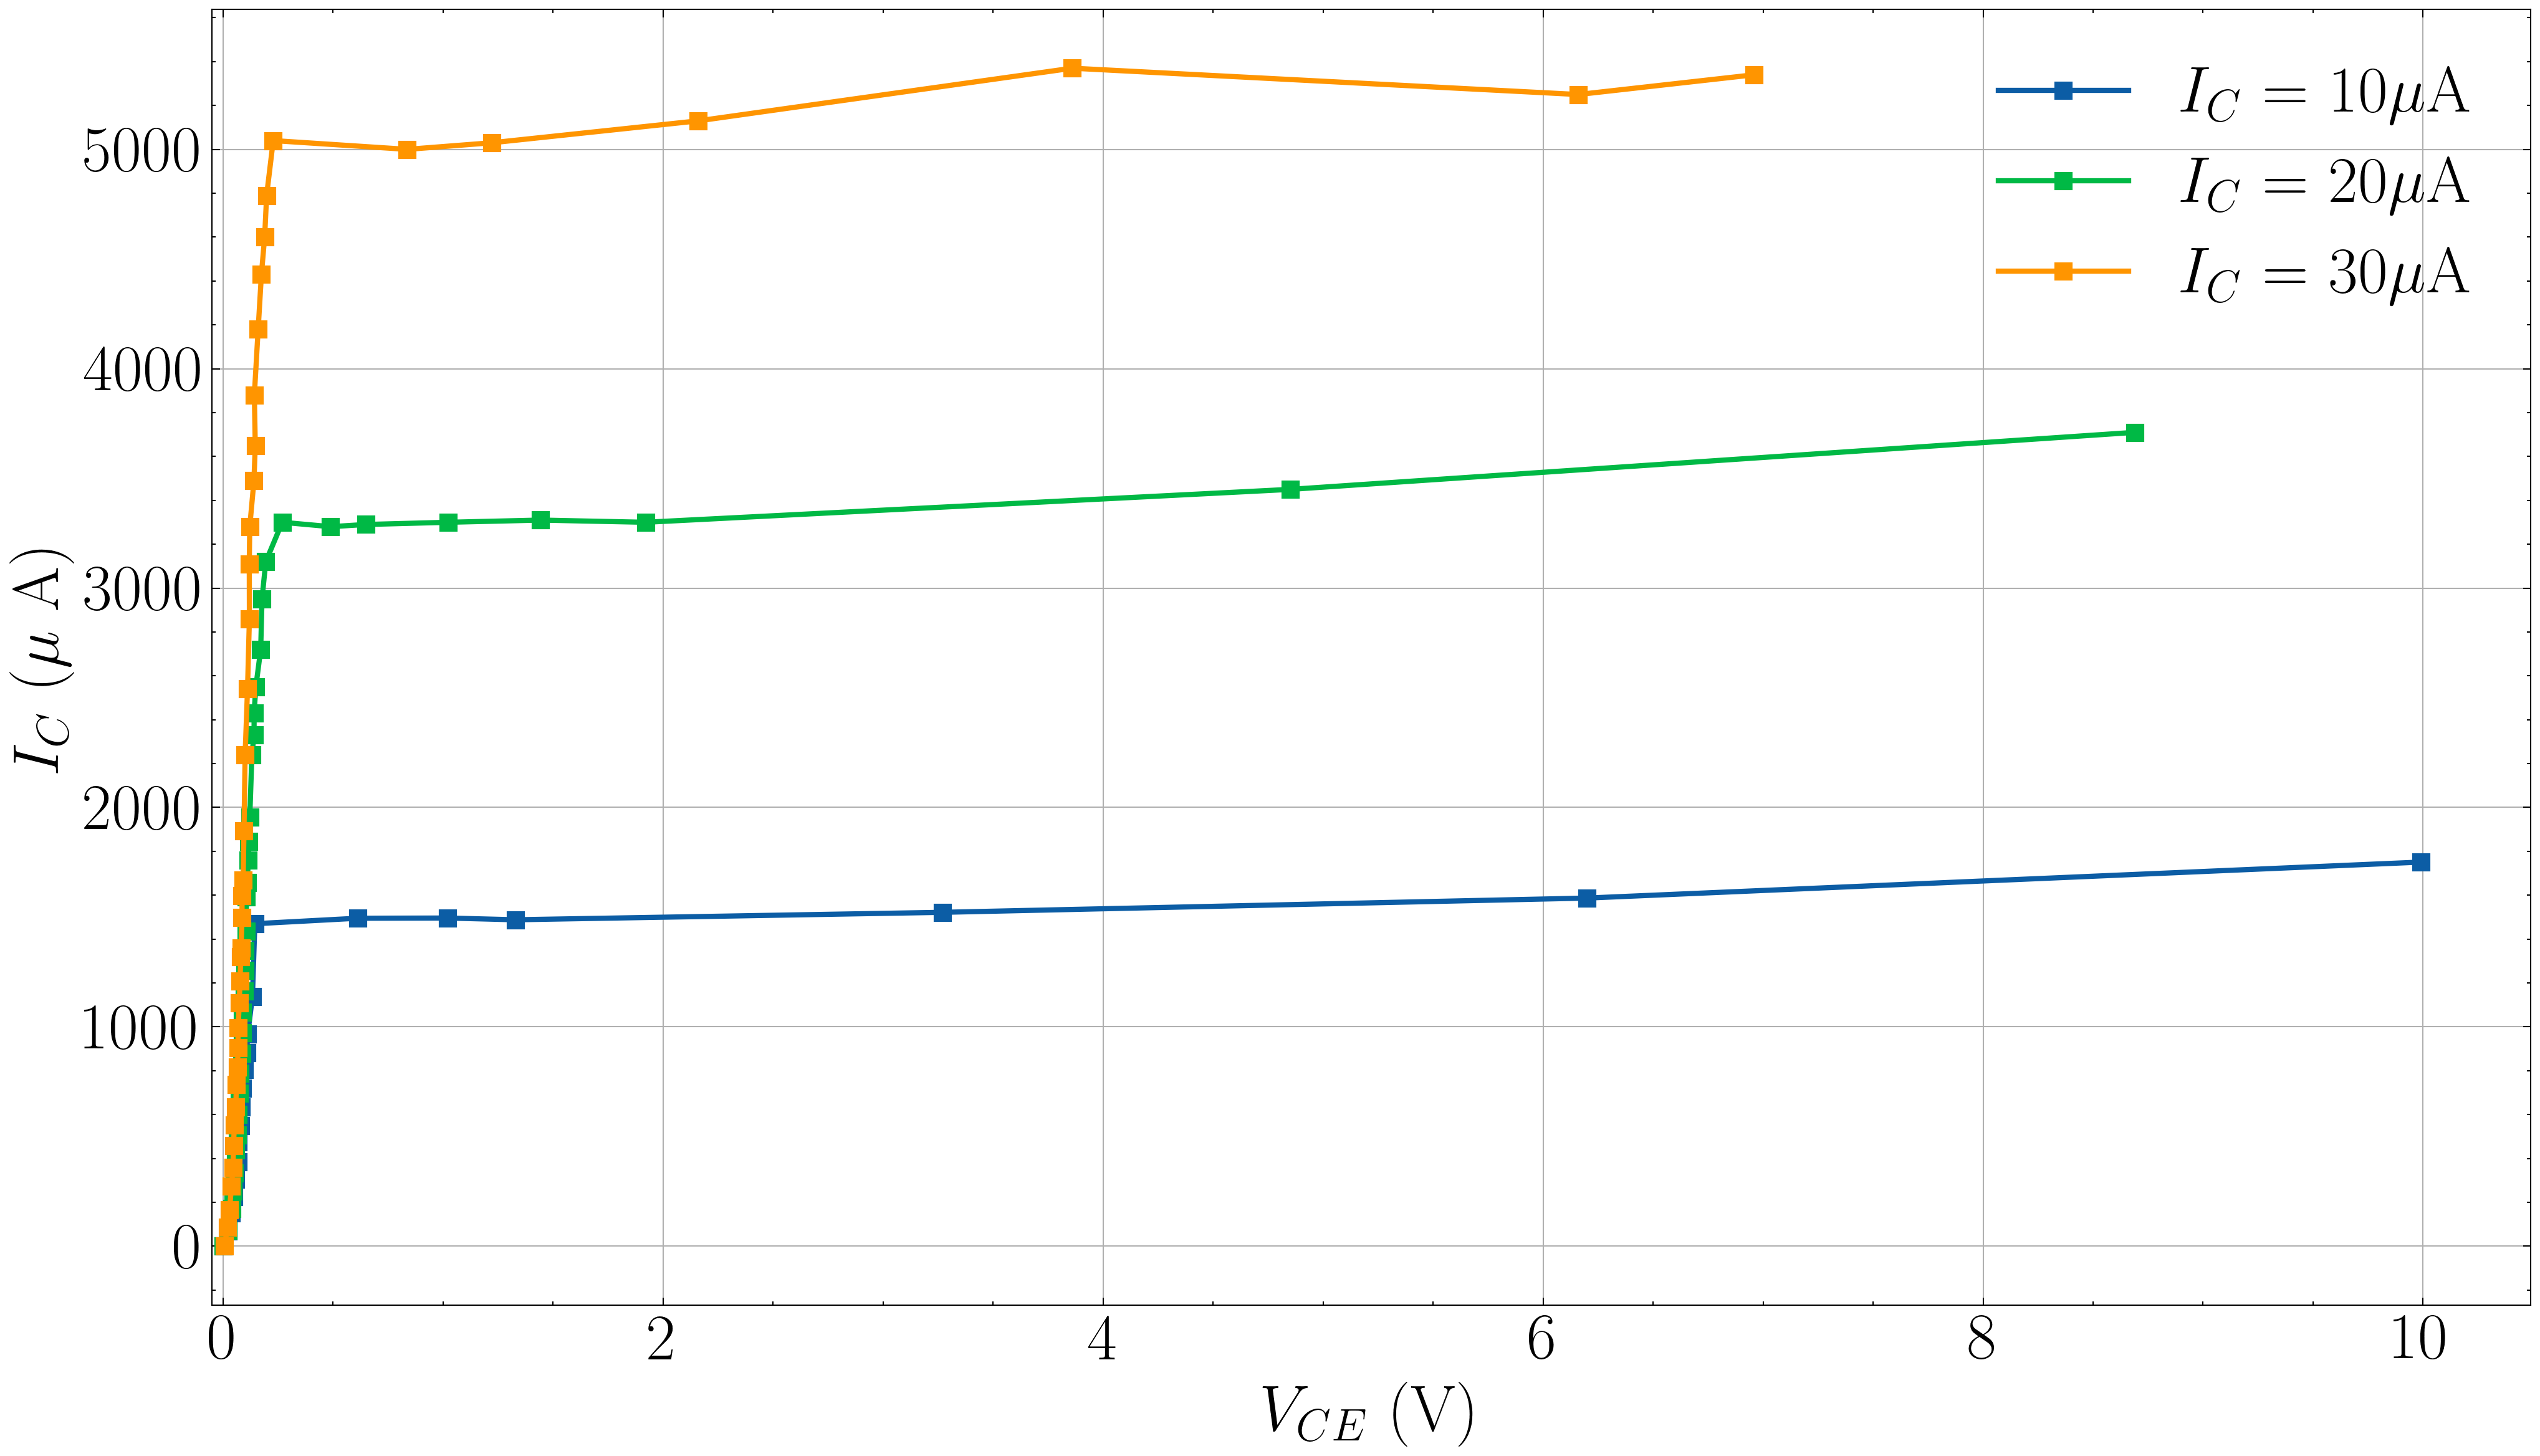

In [25]:
fig,axes = plt.subplots(1,1,figsize=(16,9), dpi = 300)
axes.plot(VC10A, IC10A, '-',lw=2,marker='s', label=r'$I_C$ = 10$\mu$A')
axes.plot(VC20A, IC20A, '-',lw=2,marker='s', label=r'$I_C$ = 20$\mu$A')
axes.plot(VC30A, IC30A, '-',lw=2,marker='s', label=r'$I_C$ = 30$\mu$A')
axes.set_xlabel(r'$V_{CE}$ (V)')
axes.set_ylabel(r'$I_C$ ($\mu$ A)')
axes.set_xlim(-0.05)
axes.legend()
axes.grid()
fig.savefig('output.png')
